In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import os
import seaborn as sns
import matplotlib.pyplot as plt

# What are SPDR Sector Funds?
SPDR Sector funds are Exchange-traded funds (ETFs) that divide the stocks that make up the S&P 500 into 11 sectors, e.g. real estate or communications. Instead of having to select and invest in individual companies from each sector to diversify their portfolio, investors can invest in these ETFs.

Naturally, using SPDR Sector Funds is just a rough measure of sector performance since it only contains a subset of stocks that are part of the S&500. A more accurate way would be to measure the returns for all publicly traded stocks belonging to an industry sector.

Here the list of SPDR Sector funds with their corresponding symbol:

- Communication Services (XLC)
- Consumer Discretionary (XLY)
- Consumer Staples (XLP)
- Energy (XLE)
- Financials (XLF)
- Health Care (XLV)
- Industrials (XLI)
- Materials (XLB)
- Real Estate (XLRE)
- Technology (XLK)
- Utilities (XLU).

In [3]:
DATA_PATH = "./Data/SPDR Sectors/"

In [4]:
def fetch_price_data(symbol, period, interval):
    #  valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,year,max
    #  valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    file_name = f"{symbol}_{period}.csv"
    path = os.path.join(DATA_PATH, file_name)
    if os.path.exists(path):
        prices_df = pd.read_csv(path)
        return prices_df
    else:
        data = yf.download(tickers=symbol, period=period, interval=interval)
        prices_df = pd.DataFrame(data)
        prices_df.dropna(inplace=True)
        prices_df.reset_index(inplace=True)
        #  Store for caching
        prices_df.to_csv(path)
        return prices_df

In [5]:
def calculate_returns(symbols, prices_dict):
    returns_df = pd.DataFrame()
    for symbol in symbols:
        #  Calculate return
        if symbol in prices_dict:
            prices_df = prices_dict[symbol]
            first_price = prices_df['Adj Close'].iloc[0]
            last_price = prices_df['Adj Close'].iloc[-1]
            return_rate = ((last_price - first_price) / first_price) * 100
            return_row = pd.DataFrame({'symbol': [symbol], 'return': [return_rate]})
            returns_df = pd.concat([returns_df, return_row], axis=0, ignore_index=True)
    return returns_df

In [6]:
#  Create data dir
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)


In [7]:
year_prices_dict = {}
quarter_prices_dict = {}
symbols = ['XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLU']
for symbol in symbols:
    #  Fetch quarter prices
    quarter_prices_dict[symbol] = fetch_price_data(symbol=symbol, period="3mo", interval="1d")
    #  Fetch year-to-date prices
    year_prices_dict[symbol] = fetch_price_data(symbol=symbol, period="1y", interval="1d")
#  Calculate returns
quarter_returns_df = calculate_returns(symbols, quarter_prices_dict)
# Sort returns
quarter_returns_df = quarter_returns_df.sort_values('return', ascending=False)
print('Last Quarter Returns:')
print(quarter_returns_df)
year_returns_df = calculate_returns(symbols, year_prices_dict)
# Sort returns
year_returns_df = year_returns_df.sort_values('return', ascending=False)
print('One Year Returns:')
print(year_returns_df)

Last Quarter Returns:
   symbol     return
9     XLK  10.240584
0     XLC   7.065959
2     XLP   5.611670
1     XLY   4.725261
10    XLU   1.275304
6     XLI   0.952125
5     XLV   0.337751
7     XLB  -2.406991
8    XLRE  -4.793845
3     XLE  -5.224171
4     XLF  -6.641840
One Year Returns:
   symbol     return
3     XLE  16.378732
9     XLK   4.322720
6     XLI   4.072570
5     XLV   2.111649
2     XLP  -0.833464
10    XLU  -3.359508
7     XLB  -3.656083
0     XLC  -5.000973
4     XLF  -6.135030
1     XLY -15.323261
8    XLRE -21.972832


# Analysis

In [61]:
df=yf.download(symbols)['Adj Close']

[*********************100%***********************]  11 of 11 completed


,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
1998-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-23,0.010448,NaN,0.020606,0.014637,0.017300,0.023609,0.023887,NaN,-0.004199,0.022223,0.004285
1998-12-24,0.022753,NaN,-0.005277,0.006583,0.013106,-0.003816,-0.001728,NaN,0.018244,0.006086,0.018160
1998-12-28,-0.008746,NaN,-0.005306,-0.013210,0.005194,0.002864,-0.005784,NaN,-0.005179,-0.014670,-0.009039
1998-12-29,0.018136,NaN,0.009925,0.010582,0.014149,0.002856,0.021802,NaN,0.016478,0.021925,0.021558
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18,0.004168,-0.005107,0.003937,0.003002,0.004759,0.003079,0.003035,-0.001604,-0.005211,-0.006866,0.001621
2023-04-19,-0.002818,-0.007538,-0.003473,0.002395,-0.000792,-0.002877,-0.000659,0.005870,0.007662,0.003066,-0.000945
2023-04-20,-0.001105,-0.010372,-0.008852,-0.002995,-0.001783,-0.006589,0.002371,-0.012044,-0.000288,-0.004114,-0.015521


<Axes: xlabel='Date'>

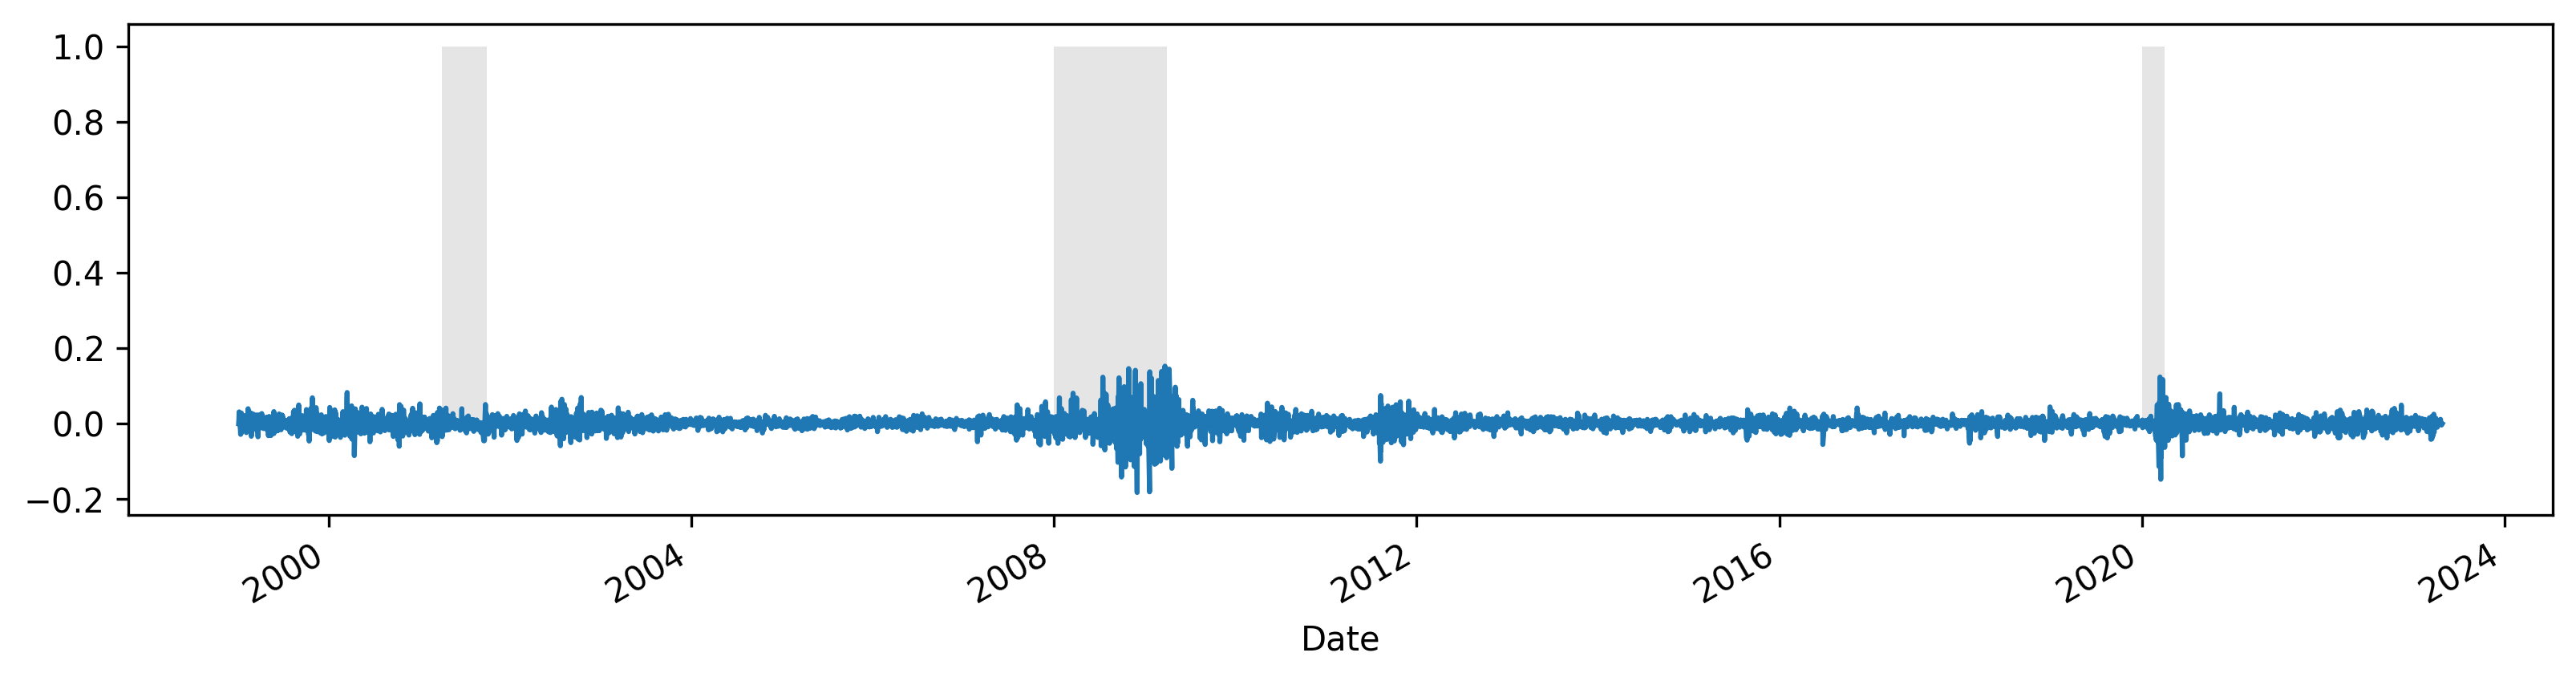

In [87]:
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
start="1999"
recessions = DataReader('USRECQ', 'fred', start=start).resample('QS').last()['USRECQ'].iloc[1:]

fig, ax = plt.subplots(figsize=(13, 3), dpi=300)
ylim = ax.get_ylim()
ax.fill_between(recessions.index, ylim[0]+1e-5, ylim[1]-1e-5, recessions,
                    facecolor='k', alpha=0.1)
np.log1p(df.pct_change()).loc[start:,"XLF"].plot(ax=ax)

# Geting the actual data

In [8]:
import financedatabase as fd

In [9]:
equities = fd.Equities()
equities_united_states = equities.select(country="United States")


In [10]:
equities_united_states.head()

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
A,"Agilent Technologies, Inc.","Agilent Technologies, Inc. provides applicatio...",USD,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Biotechnology,NYQ,New York Stock Exchange,United States,CA,Santa Clara,95051,http://www.agilent.com,Large Cap,US00846U1016,00846U101,BBG000C2V541,BBG000C2V3D6,BBG001SCTQY4
AA,Alcoa Corporation,"Alcoa Corporation, together with its subsidiar...",USD,Materials,Materials,Metals & Mining,NYQ,New York Stock Exchange,United States,PA,Pittsburgh,15212-5858,http://www.alcoa.com,Mid Cap,US0138721065,13872106,BBG00B3T3HK5,BBG00B3T3HD3,BBG00B3T3HF1
AABB,"Asia Broadband, Inc.","Asia Broadband Inc., through its subsidiary, A...",USD,Materials,Materials,Metals & Mining,PNK,OTC Bulletin Board,United States,NV,Las Vegas,89135,http://www.asiabroadbandinc.com,Micro Cap,NaN,NaN,NaN,NaN,NaN
AAC,Ares Acquisition Corporation,Ares Acquisition Corporation focuses on effect...,USD,Financials,Diversified Financials,Diversified Financial Services,NYQ,New York Stock Exchange,United States,NY,New York,10167,NaN,Small Cap,AU000000AAC9,NaN,NaN,NaN,NaN
AACS,"American Commerce Solutions, Inc.","American Commerce Solutions, Inc., through its...",USD,Industrials,Capital Goods,Machinery,PNK,OTC Bulletin Board,United States,FL,Bartow,33830,http://www.aacssymbol.com,Nano Cap,NaN,NaN,NaN,NaN,NaN


In [11]:
equities_united_states['industry_group'].unique()

array(['Pharmaceuticals, Biotechnology & Life Sciences', 'Materials',
       'Diversified Financials', 'Capital Goods',
       'Food & Staples Retailing', 'Real Estate', 'Transportation',
       'Insurance', 'Retailing',
       'Semiconductors & Semiconductor Equipment',
       'Technology Hardware & Equipment', 'Telecommunication Services',
       'Banks', 'Health Care Equipment & Services', 'Consumer Services',
       'Automobiles & Components', 'Commercial & Professional Services',
       'Software & Services', nan, 'Household & Personal Products',
       'Energy', 'Media & Entertainment', 'Utilities',
       'Consumer Durables & Apparel', 'Food, Beverage & Tobacco'],
      dtype=object)

In [12]:
sectors=equities_united_states[["sector","industry_group","market"]].dropna().reset_index().set_index(['sector','industry_group','symbol']).sort_index().copy().T
sectors.columns.names=[None]*3
idx = pd.IndexSlice
sectors.loc[:,idx[:,:]]

Communication Services                                             \
        Media & Entertainment                                              
                         ADTR                AEMC                   AESE   
market     OTC Bulletin Board  OTC Bulletin Board  NASDAQ Capital Market   

                                                                         \
                                                                          
                      AFTM                      AMC                AMLH   
market  OTC Bulletin Board  New York Stock Exchange  OTC Bulletin Board   

                                                                           \
                                                                            
                      ATIG                  ATVI                      AUD   
market  OTC Bulletin Board  NASDAQ Global Select  New York Stock Exchange   

                              ...                Utilities  \
                              ...                Utilities   
                        AVID  ...                      VST   
market  NASDAQ Global Select  ...  New York Stock Exchange   

                                                       \
                                                        
                        VST-WTA                  VWTR   
market  New York Stock Exchange  NASDAQ Global Select   

                                                                              \
                                                                               
                            WEC                WGEI                     WTRG   
market  New York Stock Exchange  OTC Bulletin Board  New York Stock Exchange   

                                                                      \
                                                                       
                         XEL                XGEN               XGEND   
market  NASDAQ Global Select  OTC Bulletin Board  OTC Bulletin Board   

                              
                              
                        YORW  
market  NASDAQ Global Select  

[1 rows x 10751 columns]

In [13]:
health_care_etfs_in_biotech=equities_united_states.query("industry=='Biotechnology'")

In [15]:
equities_united_states.index

Index(['A', 'AA', 'AABB', 'AAC', 'AACS', 'AAGC', 'AAGH', 'AAIC', 'AAIC-PB',
       'AAIC-PC',
       ...
       'ZWBC', 'ZWRK', 'ZWRKU', 'ZWRKW', 'ZY', 'ZYJT', 'ZYNE', 'ZYRX', 'ZYXI',
       'ZZZOF'],
      dtype='object', name='symbol', length=11274)

In [19]:
equities_united_states

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
A,"Agilent Technologies, Inc.","Agilent Technologies, Inc. provides applicatio...",USD,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Biotechnology,NYQ,New York Stock Exchange,United States,CA,Santa Clara,95051,http://www.agilent.com,Large Cap,US00846U1016,00846U101,BBG000C2V541,BBG000C2V3D6,BBG001SCTQY4
AA,Alcoa Corporation,"Alcoa Corporation, together with its subsidiar...",USD,Materials,Materials,Metals & Mining,NYQ,New York Stock Exchange,United States,PA,Pittsburgh,15212-5858,http://www.alcoa.com,Mid Cap,US0138721065,13872106,BBG00B3T3HK5,BBG00B3T3HD3,BBG00B3T3HF1
AABB,"Asia Broadband, Inc.","Asia Broadband Inc., through its subsidiary, A...",USD,Materials,Materials,Metals & Mining,PNK,OTC Bulletin Board,United States,NV,Las Vegas,89135,http://www.asiabroadbandinc.com,Micro Cap,NaN,NaN,NaN,NaN,NaN
AAC,Ares Acquisition Corporation,Ares Acquisition Corporation focuses on effect...,USD,Financials,Diversified Financials,Diversified Financial Services,NYQ,New York Stock Exchange,United States,NY,New York,10167,NaN,Small Cap,AU000000AAC9,NaN,NaN,NaN,NaN
AACS,"American Commerce Solutions, Inc.","American Commerce Solutions, Inc., through its...",USD,Industrials,Capital Goods,Machinery,PNK,OTC Bulletin Board,United States,FL,Bartow,33830,http://www.aacssymbol.com,Nano Cap,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYJT,Zhong Ya International Limited,Zhong Ya International Limited does not have s...,USD,Financials,Diversified Financials,Diversified Financial Services,PNK,OTC Bulletin Board,United States,NV,Henderson,89074,NaN,Nano Cap,NaN,NaN,NaN,NaN,NaN
ZYNE,"Zynerba Pharmaceuticals, Inc.","Zynerba Pharmaceuticals, Inc. operates as a cl...",USD,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Pharmaceuticals,NGM,Nordic Growth Market,United States,PA,Devon,19333,http://zynerba.com,Micro Cap,US98986X1090,98986X109,NaN,NaN,NaN
ZYRX,"Zyrox Mining International, Inc.","WSPVA Bio Products International, LLC engages ...",USD,Consumer Discretionary,Automobiles & Components,Auto Components,PNK,OTC Bulletin Board,United States,CA,Monterey,93940,http://www.dissolvingplastic.com,Nano Cap,NaN,NaN,NaN,NaN,NaN


In [57]:
equities_united_states.groupby(['sector']).count()[["name"]]

,name
sector,
Communication Services,444
Consumer Discretionary,739
Consumer Staples,402
Energy,470
Financials,3919
Health Care,1563
Industrials,1044
Information Technology,1043
Materials,424


In [59]:


list(equities_united_states.query("sector=='Utilities'").index)

['AEE',
 'AEP',
 'AEPPL',
 'AEPPZ',
 'AEPT',
 'AES',
 'AESC',
 'AGR',
 'AILIH',
 'AILIM',
 'AILIN',
 'AILIO',
 'AILIP',
 'AILLI',
 'AILLN',
 'AILLP',
 'ALE',
 'ALP-PQ',
 'ALPVN',
 'APRCP',
 'APRDM',
 'APRDN',
 'APRDO',
 'APRDP',
 'ARAO',
 'ARSC',
 'ARTNA',
 'ARTNB',
 'AT',
 'ATO',
 'AVA',
 'AWK',
 'AWR',
 'AWSL',
 'BEPC',
 'BIPC',
 'BKH',
 'BYZN',
 'CDZI',
 'CGEI',
 'CLNV',
 'CLPE',
 'CMNR',
 'CMS',
 'CMS-PB',
 'CMSD',
 'CNIG',
 'CNIGO',
 'CNIGP',
 'CNLHN',
 'CNLHO',
 'CNLHP',
 'CNLPL',
 'CNLPM',
 'CNLTL',
 'CNLTN',
 'CNLTP',
 'CNP',
 'CNP-PB',
 'CNPWM',
 'CNTHN',
 'CNTHO',
 'CNTHP',
 'CPK',
 'CPWR',
 'CWEN',
 'CWEN-A',
 'CWT',
 'D',
 'DCUE',
 'DTB',
 'DTE',
 'DTP',
 'DUK',
 'DUK-PA',
 'ED',
 'EIX',
 'ES',
 'ESLP',
 'ETR',
 'EUSP',
 'EVRG',
 'EXC',
 'FE',
 'FNRG',
 'GNE',
 'GNE-PA',
 'GRGR',
 'GSFI',
 'GWRS',
 'HE',
 'HLXW',
 'HNRC',
 'IDA',
 'IPLDP',
 'IPWLK',
 'IRCC',
 'LNT',
 'MCPB',
 'MGEE',
 'MMMW',
 'MNTK',
 'MPIR',
 'MSEX',
 'MSSEL',
 'NCEN',
 'NEE',
 'NEE-PN',
 'NEE-PO',
 'NEE-

In [26]:
import yfinance as yf

tickers = list(equities_united_states.query("sector=='Health Care'").index)
len(tickers)

1563

In [27]:

stock_data = yf.download(tickers,start="1900-01-01")['Adj Close']
stock_data = stock_data.dropna(axis='columns')

[*********************100%***********************]  1563 of 1563 completed

227 Failed downloads:
- AHROQ: No timezone found, symbol may be delisted
- PHAS: No timezone found, symbol may be delisted
- GTS: No timezone found, symbol may be delisted
- MOST: No timezone found, symbol may be delisted
- CNABQ: No timezone found, symbol may be delisted
- KSQR: No timezone found, symbol may be delisted
- ARTLW: 1d data not available for startTime=-2208971040 and endTime=1682271947. Only 100 years worth of day granularity data are allowed to be fetched per request.
- ETTX: No timezone found, symbol may be delisted
- MAXC: No timezone found, symbol may be delisted
- PRTX: No timezone found, symbol may be delisted
- TVTY: No timezone found, symbol may be delisted
- AVCO: No timezone found, symbol may be delisted
- GMTX: No timezone found, symbol may be delisted
- VREOF: No timezone found, symbol may be delisted
- CMPI: No timezone found, symbol may be delisted
- IMNPQ: No timezone found, symbol 

In [60]:
yf.download("XLU")['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
1998-12-22    12.786778
1998-12-23    12.733185
1998-12-24    12.967622
1998-12-28    12.900645
1998-12-29    13.114983
                ...    
2023-04-17    69.269997
2023-04-18    68.910004
2023-04-19    69.440002
2023-04-20    69.419998
2023-04-21    69.620003
Name: Adj Close, Length: 6122, dtype: float64

In [ ]:
import pandas as pd
import requests

FMP_key = 'd404530d4569a42dd3839a21135123e1'

# Define lists of symbols and market caps
symbols = []
market_caps = []

# Define a function to get the url based on your API key and 
def url(symbol: str, api_key):
    return "https://financialmodelingprep.com/api/v3/market-capitalization/" + symbol + "?apikey=" + api_key

# All the symbols you want the data for
all_symbols = tickers

# DataFrame to store all the data
data = pd.DataFrame(columns = ['Symbol', 'Market Cap'])
Errors=[]
# Iterate based on the symbols list and add to DataFrame
for item in all_symbols:
    response = requests.get(url(symbol = item, api_key = FMP_key)).json()
    if not response:
        Errors.append(item)
        continue
    symbols.append(response[0]['symbol'])
    market_caps.append(response[0]['marketCap'])
    


In [ ]:
# Add data to the dataframe
data['Symbol'] = symbols
data['Market Cap'] = market_caps

In [ ]:
data.sort_values('Market Cap',ascending=False)

In [30]:
def HistoricalMC(ticker):
    df=pd.read_html("https://www.marketcaphistory.com/?symbol="+ticker)[1]
    df=df.rename(columns=df.iloc[0]).drop(df.index[0])
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date',inplace=True)
    df=df.applymap(lambda x: float(x[:-1])*10**9 if x.endswith("B") else float(x[:-1])*10**6  if x.endswith("M") else float(x[:-1])*10**3 )
    return df

\begin{align}
sector\_ index_{t} =\sum _{i}\frac{{}^iMC_{t}}{\sum _{j} {}^jMC_{t}} {}^iP_{t}
\end{align}

In [47]:
HistoricalMC("A")

,A Market Cap
Date,
2010-01-31,9.760000e+09
2010-04-30,1.262000e+10
2010-07-31,9.670000e+09
2010-11-30,1.217000e+10
2011-01-31,1.444000e+10
2011-04-30,1.737000e+10
2011-07-31,1.464000e+10
2011-12-01,1.317000e+10
2012-01-31,1.476000e+10


In [31]:
MC={}
Errors={}
for ticker in tickers:
    try:
        MC[ticker]=HistoricalMC(ticker)
    except Exception as e:
        Errors[ticker]=[type(e),str(e)]


KeyboardInterrupt: 

In [36]:
(len(MC)+len(Errors))/len(tickers)

0.6871401151631478

In [40]:
MC

{'A':             A Market Cap
 Date                    
 2010-01-31  9.760000e+09
 2010-04-30  1.262000e+10
 2010-07-31  9.670000e+09
 2010-11-30  1.217000e+10
 2011-01-31  1.444000e+10
 2011-04-30  1.737000e+10
 2011-07-31  1.464000e+10
 2011-12-01  1.317000e+10
 2012-01-31  1.476000e+10
 2012-04-30  1.466000e+10
 2012-07-31  1.334000e+10
 2013-01-31  1.555000e+10
 2013-04-30  1.428000e+10
 2013-07-31  1.480000e+10
 2014-01-31  1.939000e+10
 2014-04-30  1.801000e+10
 2014-07-31  1.871000e+10
 2014-12-01  1.395000e+10
 2015-01-31  1.268000e+10
 2015-04-30  1.378000e+10
 2015-08-31  1.203000e+10
 2015-12-01  1.364000e+10
 2016-01-31  1.234000e+10
 2016-04-30  1.332000e+10
 2016-08-31  1.524000e+10
 2016-12-01  1.390000e+10
 2017-02-28  1.653000e+10
 2017-05-31  1.939000e+10
 2017-08-31  2.083000e+10
 2017-12-01  2.219000e+10
 2018-02-28  2.212000e+10
 2018-05-24  2.052000e+10
 2018-08-24  2.103000e+10
 2018-12-10  2.249000e+10
 2019-02-27  2.522000e+10
 2019-05-23  2.139000e+10
 2019-0

In [ ]:
pd.concat(MC.values(), axis=1)

In [45]:
pd.concat(MC.values(), axis=1).columns

Index(['A Market Cap', 'ABBV Market Cap', 'ABC Market Cap', 'ABEO Market Cap',
       'ABIO Market Cap', 'ABMD Market Cap', 'ABT Market Cap',
       'ABUS Market Cap', 'ABVC Market Cap', 'ACAD Market Cap',
       ...
       'OPCH Market Cap', 'OPGN Market Cap', 'OPK Market Cap',
       'OPNT Market Cap', 'OPRX Market Cap', 'OPTN Market Cap',
       'ORGO Market Cap', 'ORGS Market Cap', 'ORIC Market Cap',
       'ORMP Market Cap'],
      dtype='object', length=625)